# Analiza podataka

U okviru ovog dela projektnog zadatka izvršena je analiza podataka i na taj način pripremljen skup podataka za dalje analize.

## Učitavanje potrebnih biblioteka i originalnog skupa podataka

In [1]:
# učitavanje potrebnih biblioteka
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
# učitavanje skupa podataka
data = pd.read_csv("data/carvana.csv")

In [3]:
data.shape

(6798, 34)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              6798 non-null   int64  
 1   PurchDate                          6798 non-null   object 
 2   Auction                            2983 non-null   object 
 3   VehYear                            6798 non-null   int64  
 4   VehicleAge                         6798 non-null   int64  
 5   Make                               6798 non-null   object 
 6   Model                              6798 non-null   object 
 7   Trim                               6566 non-null   object 
 8   SubModel                           6798 non-null   object 
 9   Color                              6798 non-null   object 
 10  Transmission                       6798 non-null   object 
 11  WheelTypeID                        6515 non-null   float

In [5]:
pd.set_option('display.max_columns', 35)
data.describe(include = "all")

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
count,6798.000000,6798,2983,6798.000000,6798.000000,6798,6798,6566,6798,6798,6798,6515.000000,6459,6798.000000,6797,6797,6797,6797.000000,6797.000000,6797.000000,6797.000000,6777.000000,6777.000000,6777.000000,6777.000000,339,339,6798.000000,6798.000000,1131,6798.000000,6798.000000,6798.000000,6798.000000
unique,NaN,503,2,NaN,NaN,32,632,104,465,16,2,NaN,2,NaN,4,12,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,1/30/2010 0:09,OTHER,NaN,NaN,CHEVROLET,PT CRUISER,Bas,4D SEDAN,SILVER,AUTO,NaN,Alloy,NaN,AMERICAN,MEDIUM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,GREEN,NaN,NaN,FL,NaN,NaN,NaN,NaN
freq,NaN,42,1598,NaN,NaN,1574,216,1316,1449,1379,6547,NaN,3376,NaN,5639,2888,2328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324,326,NaN,NaN,983,NaN,NaN,NaN,NaN
mean,3399.500000,NaN,NaN,2005.332451,4.183142,NaN,NaN,NaN,NaN,NaN,NaN,1.490407,NaN,71499.390115,NaN,NaN,NaN,6153.684125,7405.387524,8517.821539,9880.576431,6152.180906,7418.757710,8786.704146,10168.581231,NaN,NaN,26244.618270,57898.912474,NaN,6759.792239,0.027067,1272.778758,0.127390
std,1962.557897,NaN,NaN,1.733395,1.719690,NaN,NaN,NaN,NaN,NaN,NaN,0.516856,NaN,14646.256617,NaN,NaN,NaN,2465.206950,2731.341954,3145.988442,3383.682106,2431.564892,2682.628698,3088.425185,3305.444219,NaN,NaN,25322.610147,26081.837405,NaN,1745.699606,0.162290,597.720416,0.333434
min,1.000000,NaN,NaN,2001.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,15249.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,835.000000,2764.000000,NaN,2150.000000,0.000000,462.000000,0.000000
25%,1700.250000,NaN,NaN,2004.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,62002.750000,NaN,NaN,NaN,4273.000000,5415.000000,6301.000000,7493.000000,4274.000000,5434.000000,6531.000000,7810.000000,NaN,NaN,17675.000000,30331.000000,NaN,5465.000000,0.000000,834.000000,0.000000
50%,3399.500000,NaN,NaN,2005.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,73562.000000,NaN,NaN,NaN,6148.000000,7353.000000,8473.000000,9821.000000,6091.000000,7352.000000,8760.000000,10114.000000,NaN,NaN,19662.000000,74135.000000,NaN,6740.000000,0.000000,1169.000000,0.000000
75%,5098.750000,NaN,NaN,2007.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,82551.750000,NaN,NaN,NaN,7774.000000,9014.000000,10626.000000,12083.000000,7720.000000,9014.000000,10884.000000,12308.000000,NaN,NaN,22808.000000,80022.000000,NaN,7935.000000,0.000000,1623.000000,0.000000


## Nedostajuće vrednosti

Postavlja se pitanje da li u skupu podataka postoje kolone koje imaju nedostajuće vrednosti, i koliko takvih kolona ima.

In [6]:
data.isna().any()

RefId                                False
PurchDate                            False
Auction                               True
VehYear                              False
VehicleAge                           False
Make                                 False
Model                                False
Trim                                  True
SubModel                             False
Color                                False
Transmission                         False
WheelTypeID                           True
WheelType                             True
VehOdo                               False
Nationality                           True
Size                                  True
TopThreeAmericanName                  True
MMRAcquisitionAuctionAveragePrice     True
MMRAcquisitionAuctionCleanPrice       True
MMRAcquisitionRetailAveragePrice      True
MMRAcquisitonRetailCleanPrice         True
MMRCurrentAuctionAveragePrice         True
MMRCurrentAuctionCleanPrice           True
MMRCurrentR

In [7]:
data.isna().any().sum()

18

Na osnovu dobijenog rezultata zaključujemo da postoji 18 atributa koji poseduju nedostajuće vrednosti. U kasnijem delu rada u zavisnosti od tipa podataka kolone koja poseduje nedostajuće vrednosti vršimo njihovo popunjavanje, ili izostavljamo atribut u slučaju velikog broja nedostajućih vrednosti.

## Popunjavanje nedostajućih vrednosti, donošenje odluka o izostavljanju atributa

Atribut *PurchDate* se odnosi na datum kada je automobil stavljen na aukciju.

In [8]:
data['PurchDate'].nunique()

503

In [9]:
data['PurchDate'].value_counts()

1/30/2010 0:09    42
1/25/2009 0:02    41
1/20/2010 0:10    40
1/4/2009 0:03     36
1/16/2010 0:11    36
                  ..
1/29/2010 0:12     1
1/8/2010 0:01      1
1/27/2010 0:09     1
1/16/2009 0:01     1
1/24/2009 0:04     1
Name: PurchDate, Length: 503, dtype: int64

Kako smatramo da godina u ovom datumu igra ključnu ulogu, uzeći u obzir da su svi automobili stavljeni na aukciju u istom mesecu, iz ovog datuma izdvajamo godinu i pravimo novi atribut *PurchYear*, dok ćemo na samom kraju zajedno sa drugim atributima  iz dalje analize izbaciti atribut *PurchDate*.

In [10]:
data['PurchYear'] = pd.DatetimeIndex(data['PurchDate']).year

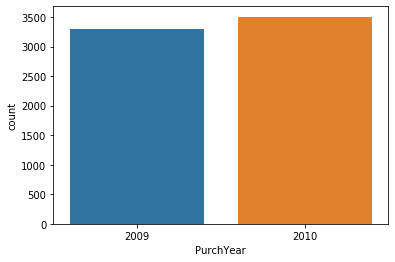

In [11]:
sns.countplot(x = 'PurchYear', data=data)

Sa grafika se vidi da postoji približno isti broj automobila u jedine dve godine u kojima su automobili stavljani na aukciju.

Sledeći atribut *Auction* se odnosi na dobavljača automobila i za njega se u prvom delu rada pokazalo da sadrži nedostajuće vrednosti. A koliko ih ima?

In [12]:
data['Auction'].isna().sum()

3815

In [13]:
data['Auction'].value_counts()

OTHER    1598
ADESA    1385
Name: Auction, dtype: int64

Čak 3815 nedostajućih vrednosti (vise od 50%) što je sasvim dovoljan razlog za izostavljanje ovog atributa iz dalje analize, a pored toga za 1598 automobila dobavljači su svrstani u grupu *OTHER* što ovaj atribut takođe čini nepraktičnim.

U nastavku izvršena je kratka analiza atributa *VehYear* koji se odnosi na godinju poizvodnje automobila i *VehicleAge* koji se odnosi na "starost" automobila u godinama.

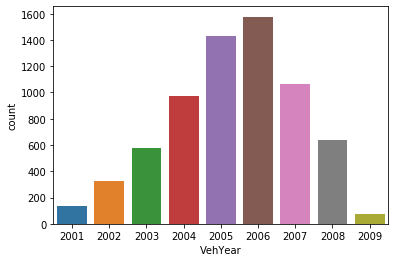

In [14]:
sns.countplot(x = 'VehYear', data=data)

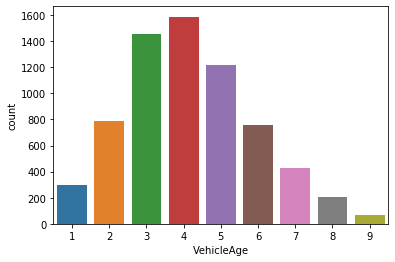

In [15]:
sns.countplot(x = 'VehicleAge', data=data)

Ono što se zdravorazumski može zaključiti jeste da su pomenuta dva atributa visoko korelisana, što nam daje mogućnost izbacivanja jednog od njih. Kako smatramo da će atribut *VehicleAge* da zahteva manje "napora" za korišćenje, iz dalje analize izostavljamo *VehYear*.

In [16]:
pd.crosstab(data['VehYear'], data['VehicleAge'])

VehicleAge,1,2,3,4,5,6,7,8,9
VehYear,,,,,,,,,
2001,0,0,0,0,0,0,0,72,66
2002,0,0,0,0,0,0,191,135,0
2003,0,0,0,0,0,337,238,0,0
2004,0,0,0,0,559,417,0,0,0
2005,0,0,0,774,655,0,0,0,0
2006,0,0,763,814,0,0,0,0,0
2007,0,375,690,0,0,0,0,0,0
2008,222,417,0,0,0,0,0,0,0
2009,73,0,0,0,0,0,0,0,0


Atribut *Make* se odnosi na marku automobila. Koliko različitih marki automobila je dostupno u ovom skupu podataka?

In [17]:
data['Make'].nunique()

32

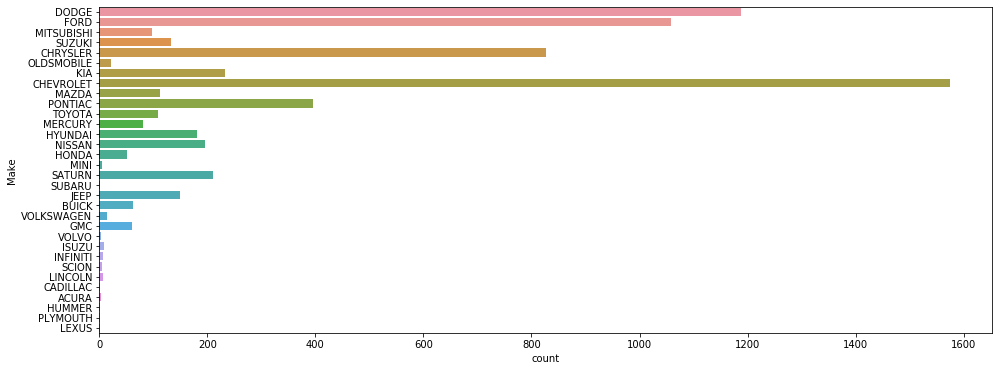

In [18]:
plt.figure(figsize=(16, 6))
sns.countplot(y = 'Make', data=data)

Pored marke, izuzetno bitan atribut je svakako i *Model*. 

In [19]:
data['Model'].value_counts()

PT CRUISER              216
IMPALA                  194
TAURUS                  128
CARAVAN GRAND FWD V6    118
CALIBER                 117
                       ... 
MAZDA3 2.3L I4 MPI        1
PATHFINDER 4WD V6 4.      1
MONTEREY 4.2L V6 SPI      1
RELAY 2WD V6 3.9L V6      1
PATHFINDER 4WD V6         1
Name: Model, Length: 632, dtype: int64

Originalni skup podataka sadrži 632 modela automobila. Ideja nam je da svedemo ovaj broj na prilično manji kako prilikom kreiranja modela u nastavku ne bi došlo do pretreniranja modela.

Shodno tome, došli smo do saznanja da se u okviru naziva modela automobila, pored osnovnog naziva modela može naći i oznaka za *vrstu pogona* i oznaka za *broj cilindara na motoru*.
Postoje tri oznake za vrstu pogona:

1) oznaka **AWD** (all-wheel drive): kod *pogona na sve točkove* sistem je optimizovan za vožnju na putu i ima sposobnost da snagu motora pošalje na sve četiri gume u isto vreme. Ovakav tip pogona omogućava da se vozilo kreće mnogo bolje nego kada ima pogon na prednjim ili zadnjim točkovima na putevima prekrivenim snegom i vodom.

2) oznaka **4WD** (four-wheel drive): kod *pogona na sva 4 točka* sistem je namenjen za vožnju prvenstveno van puteva ili na ekstremno klizavim površinama. U pitanju je sistem koji sam vozač najčešće mora da odabere pritiskom dugmeta. U tom slučaju prednje i zadnje osovine se okreću istom brzinom. Rezervisan je za vozila sa ozbiljnim terenskim sposobnostima.

3) oznaka **2WD** (two-wheel drive): se koristi za vozilo koje ima pogon na dva točka sa četiri točka. Kod ovakvih sistema upravljački točkovi mogu biti ili zadnji ili prednji točkovi, ali su obično zadnji.

Pored toga, oznake *V8*,*V6*,*6C*,*I6* se odnose na broj cilindara na motoru.

Na osnovu prethodno navedenih činjenica napravljeni su atributi *DriveType* i *NumCyls*.

In [20]:
data.loc[data['Model'].str.contains("AWD"), 'DriveType']="AWD"
data.loc[data['Model'].str.contains("4WD"), 'DriveType']="4WD"
data.loc[~data['Model'].str.contains("AWD|4WD"), 'DriveType']="2WD"

data.loc[data['Model'].str.contains("V8"), 'NumCyls']=8
data.loc[data['Model'].str.contains("V6|6C|I6"), 'NumCyls']=6
data.loc[~data['Model'].str.contains("V6|6C|I6|V8"), 'NumCyls']=4

In [21]:
# Za ovu karakteristiku ima malo poznatih vrednosti, pa shodno tome nije pravljen poseban atribut
data[data['Model'].str.contains("FWD|RWD|AWD")]

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy,PurchYear,DriveType,NumCyls
23,24,1/3/2010 0:05,ADESA,2005,5,CHRYSLER,PACIFICA FWD,Tou,4D SPORT TOURING,SILVER,AUTO,1.0,Alloy,85334,AMERICAN,CROSSOVER,CHRYSLER,...,13662.0,7228.0,8967.0,10679.0,12522.0,NaN,NaN,20928,33619,FL,8335.0,0,1503,0,2010,2WD,4.0
35,36,1/15/2010 0:11,ADESA,2004,6,MITSUBISHI,ENDEAVOR AWD,LS,4D SPORT UTILITY LS,SILVER,AUTO,1.0,Alloy,75878,OTHER ASIAN,MEDIUM SUV,OTHER,...,10470.0,5526.0,7061.0,8850.0,10567.0,NO,GREEN,19638,33619,FL,7200.0,0,920,0,2010,AWD,4.0
60,61,1/25/2010 0:03,ADESA,2005,5,CHRYSLER,PACIFICA FWD,Bas,4D SPORT,SILVER,AUTO,1.0,Alloy,63774,AMERICAN,CROSSOVER,CHRYSLER,...,11728.0,6659.0,8171.0,9948.0,11431.0,NaN,NaN,20740,20166,VA,8425.0,0,1215,0,2010,2WD,4.0
61,62,1/28/2010 0:04,ADESA,2003,7,FORD,WINDSTAR FWD V6,SEL,4D PASSENGER 3.8L SEL,GREEN,AUTO,1.0,Alloy,97399,AMERICAN,VAN,FORD,...,8154.0,3968.0,5413.0,7545.0,9959.0,NaN,NaN,52117,20166,VA,4680.0,0,2506,0,2010,2WD,6.0
67,68,1/7/2010 0:07,ADESA,2005,5,FORD,FREESTAR FWD V6,S,PASSENGER 3.9L,GOLD,AUTO,2.0,Covers,71094,AMERICAN,VAN,FORD,...,9554.0,5131.0,6345.0,8925.0,10234.0,NaN,NaN,19619,20166,VA,5270.0,0,1506,0,2010,2WD,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6774,6775,1/2/2009 0:09,ADESA,2005,4,DODGE,CARAVAN FWD V6 3.3L,SXT,MINIVAN 3.3L SE,BLUE,AUTO,1.0,Alloy,71095,AMERICAN,VAN,CHRYSLER,...,8043.0,4302.0,5737.0,7562.0,9338.0,NaN,NaN,8172,30212,NaN,6600.0,0,1623,0,2009,2WD,6.0
6776,6777,1/9/2009 0:09,ADESA,2006,3,CHEVROLET,UPLANDER FWD V6 3.5L,LS,PASSENGER EXT 3.5L,MAROON,AUTO,2.0,Covers,60171,AMERICAN,VAN,GM,...,10486.0,7465.0,9245.0,12122.0,13888.0,NaN,NaN,18881,30212,NaN,8000.0,0,1801,0,2009,2WD,6.0
6780,6781,1/23/2009 0:09,ADESA,2001,8,DODGE,CARAVAN FWD 4C 2.4L,SE,MINIVAN 2.4L SE,WHITE,AUTO,2.0,Covers,77407,AMERICAN,VAN,CHRYSLER,...,3856.0,2112.0,3107.0,2781.0,3856.0,NaN,NaN,20740,30212,NaN,3200.0,0,1923,1,2009,2WD,4.0
6786,6787,1/7/2009 0:10,ADESA,2005,4,FORD,FREESTAR FWD V6 3.9L,S,PASSENGER 3.9L,GREY,AUTO,2.0,Covers,66745,AMERICAN,VAN,FORD,...,7184.0,4407.0,5841.0,8314.0,9913.0,NaN,NaN,18881,30212,NaN,5100.0,0,1313,0,2009,2WD,6.0


Takođe, u nastavku je promenjena "struktura" atributa *Model*. Ideja je da u okviru ovog atributa ostane isključivo onaj deo naziva modela koji ne sadrži informaciju o broju cilindara, niti o načinu pogona, već isključivo "osnovni" naziv modela. 

In [22]:
data.loc[data['Model'].str.contains("STRATUS"), 'Model']="STRATUS"
data.loc[data['Model'].str.contains("NEON"), 'Model']="NEON"
data.loc[data['Model'].str.contains("FOCUS"), 'Model']="FOCUS"
data.loc[data['Model'].str.contains("GALANT"), 'Model']="GALANT"
data.loc[data['Model'].str.contains("RAM"), 'Model']="RAM"
data.loc[data['Model'].str.contains("DURANGO"), 'Model']="DURANGO"
data.loc[data['Model'].str.contains("F150"), 'Model']="F150"
data.loc[data['Model'].str.contains("ALERO"), 'Model']="ALERO"
data.loc[data['Model'].str.contains("OPTIMA"), 'Model']="OPTIMA"
data.loc[data['Model'].str.contains("RANGER"), 'Model']="RANGER"
data.loc[data['Model'].str.contains("TAURUS"), 'Model']="TAURUS"
data.loc[data['Model'].str.contains("IMPALA"), 'Model']="IMPALA"
data.loc[data['Model'].str.contains("EXPEDITION"), 'Model']="EXPEDITION"
data.loc[data['Model'].str.contains("MAZDA"), 'Model']="MAZDA"
data.loc[data['Model'].str.contains("COBALT"), 'Model']="COBALT"
data.loc[data['Model'].str.contains("PACIFICA"), 'Model']="PACIFICA"
data.loc[data['Model'].str.contains("SUNFIRE"), 'Model']="SUNFIRE"
data.loc[data['Model'].str.contains("PT CRUISER"), 'Model']="PT CRUISER"
data.loc[data['Model'].str.contains("FORENZA"), 'Model']="FORENZA"

data.loc[data['Model'].str.contains("GRAND PRIX"), 'Model']="GRAND PRIX"
data.loc[data['Model'].str.contains("COROLLA"), 'Model']="COROLLA"
data.loc[data['Model'].str.contains("SABLE"), 'Model']="SABLE"
data.loc[data['Model'].str.contains("ELANTRA"), 'Model']="ELANTRA"
data.loc[data['Model'].str.contains("AVENGER"), 'Model']="AVENGER"
data.loc[data['Model'].str.contains("ENDEAVOR"), 'Model']="ENDEAVOR"
data.loc[data['Model'].str.contains("G6"), 'Model']="G6"
data.loc[data['Model'].str.contains("SPECTRA"), 'Model']="SPECTRA"
data.loc[data['Model'].str.contains("MUSTANG"), 'Model']="MUSTANG"
data.loc[data['Model'].str.contains("CHARGER"), 'Model']="CHARGER"
data.loc[data['Model'].str.contains("SONATA"), 'Model']="SONATA"
data.loc[data['Model'].str.contains("TRAILBLAZER"), 'Model']="TRAILBLAZER"
data.loc[data['Model'].str.contains("SENTRA"), 'Model']="SENTRA"
data.loc[data['Model'].str.contains("ACCORD"), 'Model']="ACCORD"
data.loc[data['Model'].str.contains("WINDSTAR"), 'Model']="WINDSTAR"
data.loc[data['Model'].str.contains("LANCER"), 'Model']="LANCER"
data.loc[data['Model'].str.contains("COOPER"), 'Model']="COOPER"
data.loc[data['Model'].str.contains("FREESTAR"), 'Model']="FREESTAR"
data.loc[data['Model'].str.contains("MAXIMA"), 'Model']="MAXIMA"
data.loc[data['Model'].str.contains("ACCENT"), 'Model']="ACCENT"

data.loc[data['Model'].str.contains("EXPLORER"), 'Model']="EXPLORER"
data.loc[data['Model'].str.contains("SEBRING"), 'Model']="SEBRING"
data.loc[data['Model'].str.contains("CALIBER"), 'Model']="CALIBER"
data.loc[data['Model'].str.contains("GALANT"), 'Model']="GALANT"
data.loc[data['Model'].str.contains("MAGNUM"), 'Model']="MAGNUM"
data.loc[data['Model'].str.contains("RONDO"), 'Model']="RONDO"
data.loc[data['Model'].str.contains("HHR"), 'Model']="HHR"
data.loc[data['Model'].str.contains("FORESTER"), 'Model']="FORESTER"
data.loc[data['Model'].str.contains("FIVE HUNDRED"), 'Model']="FIVE HUNDRED"
data.loc[data['Model'].str.contains("YARIS"), 'Model']="YARIS"
data.loc[data['Model'].str.contains("ESCAPE"), 'Model']="ESCAPE"
data.loc[data['Model'].str.contains("SPORTAGE"), 'Model']="SPORTAGE"
data.loc[data['Model'].str.contains("ALTIMA"), 'Model']="ALTIMA"
data.loc[data['Model'].str.contains("CAVALIER"), 'Model']="CAVALIER"
data.loc[data['Model'].str.contains("AVEO"), 'Model']="AVEO"
data.loc[data['Model'].str.contains("CARAVAN"), 'Model']="CARAVAN"
data.loc[data['Model'].str.contains("MILAN"), 'Model']="MILAN"
data.loc[data['Model'].str.contains("LIBERTY"), 'Model']="LIBERTY"
data.loc[data['Model'].str.contains("MALIBU"), 'Model']="MALIBU"

data.loc[data['Model'].str.contains("EQUINOX"), 'Model']="EQUINOX"
data.loc[data['Model'].str.contains("UPLANDER"), 'Model']="UPLANDER"
data.loc[data['Model'].str.contains("SORENTO"), 'Model']="SORENTO"
data.loc[data['Model'].str.contains("SANTA"), 'Model']="SANTA"
data.loc[data['Model'].str.contains("XG 350"), 'Model']="XG 350"
data.loc[data['Model'].str.contains("TRACKER"), 'Model']="TRACKER"
data.loc[data['Model'].str.contains("FREESTYLE"), 'Model']="FREESTYLE"
data.loc[data['Model'].str.contains("ELEMENT"), 'Model']="ELEMENT"
data.loc[data['Model'].str.contains("FUSION"), 'Model']="FUSION"
data.loc[data['Model'].str.contains("PARK AVENUE"), 'Model']="PARK AVENUE"
data.loc[data['Model'].str.contains("VENTURE"), 'Model']="VENTURE"
data.loc[data['Model'].str.contains("CIVIC"), 'Model']="CIVIC"
data.loc[data['Model'].str.contains("BEETLE"), 'Model']="BEETLE"
data.loc[data['Model'].str.contains("TACOMA"), 'Model']="TACOMA"
data.loc[data['Model'].str.contains("ENVOY"), 'Model']="ENVOY"
data.loc[data['Model'].str.contains("FOCUS"), 'Model']="FOCUS"
data.loc[data['Model'].str.contains("CHEROKEE"), 'Model']="CHEROKEE"
data.loc[data['Model'].str.contains("VUE"), 'Model']="VUE"
data.loc[data['Model'].str.contains("CAMRY"), 'Model']="CAMRY"
data.loc[data['Model'].str.contains("COLORADO"), 'Model']="COLORADO"

data.loc[data['Model'].str.contains("TOWN & COUNTRY"), 'Model']="TOWN & COUNTRY"
data.loc[data['Model'].str.contains("AVALANCHE"), 'Model']="AVALANCHE"
data.loc[data['Model'].str.contains("AURA"), 'Model']="AURA"
data.loc[data['Model'].str.contains("SEDONA"), 'Model']="SEDONA"
data.loc[data['Model'].str.contains("TAHOE"), 'Model']="TAHOE"
data.loc[data['Model'].str.contains("VIBE"), 'Model']="VIBE"
data.loc[data['Model'].str.contains("GRAND AM"), 'Model']="GRAND AM"
data.loc[data['Model'].str.contains("REGAL"), 'Model']="REGAL"
data.loc[data['Model'].str.contains("SUBURBAN"), 'Model']="SUBURBAN"
data.loc[data['Model'].str.contains("LACROSSE"), 'Model']="LACROSSE"
data.loc[data['Model'].str.contains("S40"), 'Model']="S40"
data.loc[data['Model'].str.contains("MONTANA"), 'Model']="MONTANA"
data.loc[data['Model'].str.contains("MURANO"), 'Model']="MURANO"
data.loc[data['Model'].str.contains("TRIBUTE"), 'Model']="TRIBUTE"
data.loc[data['Model'].str.contains("COMMANDER"), 'Model']="COMMANDER"
data.loc[data['Model'].str.contains("SILVERADO"), 'Model']="SILVERADO"
data.loc[data['Model'].str.contains("MONTEGO"), 'Model']="MONTEGO"
data.loc[data['Model'].str.contains("ECLIPSE"), 'Model']="ECLIPSE"
data.loc[data['Model'].str.contains("ASCENDER"), 'Model']="ASCENDER"

data.loc[data['Model'].str.contains("TITAN"), 'Model']="TITAN"
data.loc[data['Model'].str.contains("AMANTI"), 'Model']="AMANTI"
data.loc[data['Model'].str.contains("G35"), 'Model']="G35"
data.loc[data['Model'].str.contains("S10"), 'Model']="S10"
data.loc[data['Model'].str.contains("MONTE CARLO"), 'Model']="MONTE CARLO"
data.loc[data['Model'].str.contains("XTERRA"), 'Model']="XTERRA"
data.loc[data['Model'].str.contains("RENDEZVOUS"), 'Model']="RENDEZVOUS"
data.loc[data['Model'].str.contains("SIERRA"), 'Model']="SIERRA"
data.loc[data['Model'].str.contains("OUTLANDER"), 'Model']="OUTLANDER"
data.loc[data['Model'].str.contains("XB"), 'Model']="XB"
data.loc[data['Model'].str.contains("MARINER"), 'Model']="MARINER"
data.loc[data['Model'].str.contains("TUCSON"), 'Model']="TUCSON"
data.loc[data['Model'].str.contains("VERONA"), 'Model']="VERONA"
data.loc[data['Model'].str.contains("MPV"), 'Model']="MPV"
data.loc[data['Model'].str.contains("RENO"), 'Model']="RENO"
data.loc[data['Model'].str.contains("SX4"), 'Model']="SX4"
data.loc[data['Model'].str.contains("LE SABRE"), 'Model']="LE SABRE"
data.loc[data['Model'].str.contains("DAKOTA"), 'Model']="DAKOTA"
data.loc[data['Model'].str.contains("NITRO"), 'Model']="NITRO"
data.loc[data['Model'].str.contains("TOWN CAR"), 'Model']="TOWN CAR"

data.loc[data['Model'].str.contains("MOUNTAINEER"), 'Model']="MOUNTAINEER"
data.loc[data['Model'].str.contains("AERIO"), 'Model']="AERIO"
data.loc[data['Model'].str.contains("MONTEREY"), 'Model']="MONTEREY"
data.loc[data['Model'].str.contains("L SERIES"), 'Model']="L SERIES"
data.loc[data['Model'].str.contains("PROTEGE"), 'Model']="PROTEGE"
data.loc[data['Model'].str.contains("QX4"), 'Model']="QX4"
data.loc[data['Model'].str.contains("CENTURY"), 'Model']="CENTURY"
data.loc[data['Model'].str.contains("AVIATOR"), 'Model']="AVIATOR"
data.loc[data['Model'].str.contains("TIBURON"), 'Model']="TIBURON"
data.loc[data['Model'].str.contains("YUKON"), 'Model']="YUKON"
data.loc[data['Model'].str.contains("PATRIOT"), 'Model']="PATRIOT"
data.loc[data['Model'].str.contains("MATRIX"), 'Model']="MATRIX"
data.loc[data['Model'].str.contains("XA"), 'Model']="XA"
data.loc[data['Model'].str.contains("S SERIES"), 'Model']="S SERIES"
data.loc[data['Model'].str.contains("PATHFINDER"), 'Model']="PATHFINDER"
data.loc[data['Model'].str.contains("CONCORDE"), 'Model']="CONCORDE"
data.loc[data['Model'].str.contains("INTREPID"), 'Model']="INTREPID"
data.loc[data['Model'].str.contains("GRAND MARQUIS"), 'Model']="GRAND MARQUIS"
data.loc[data['Model'].str.contains("VERSA"), 'Model']="VERSA"
data.loc[data['Model'].str.contains("JOURNEY"), 'Model']="JOURNEY"

data.loc[data['Model'].str.contains("CTS"), 'Model']="CTS"
data.loc[data['Model'].str.contains("3.2 TL"), 'Model']="3.2 TL"
data.loc[data['Model'].str.contains("FRONTIER"), 'Model']="FRONTIER"
data.loc[data['Model'].str.contains("JETTA"), 'Model']="JETTA"
data.loc[data['Model'].str.contains("MONTERO"), 'Model']="MONTERO"
data.loc[data['Model'].str.contains("H3"), 'Model']="H3"
data.loc[data['Model'].str.contains("BONNEVILLE"), 'Model']="BONNEVILLE"
data.loc[data['Model'].str.contains("SEQUOIA"), 'Model']="SEQUOIA"
data.loc[data['Model'].str.contains("XL-7"), 'Model']="XL-7"
data.loc[data['Model'].str.contains("RELAY"), 'Model']="RELAY"
data.loc[data['Model'].str.contains("VOYAGER"), 'Model']="VOYAGER"
data.loc[data['Model'].str.contains("MIATA"), 'Model']="MIATA"
data.loc[data['Model'].str.contains("B3000"), 'Model']="B3000"
data.loc[data['Model'].str.contains("SONOMA"), 'Model']="SONOMA"
data.loc[data['Model'].str.contains("QUEST"), 'Model']="QUEST"
data.loc[data['Model'].str.contains("CR-V"), 'Model']="CR-V"
data.loc[data['Model'].str.contains("SILHOUETTE"), 'Model']="SILHOUETTE"
data.loc[data['Model'].str.contains("WRANGLER"), 'Model']="WRANGLER"
data.loc[data['Model'].str.contains("CONTINENTAL"), 'Model']="CONTINENTAL"
data.loc[data['Model'].str.contains("GS300"), 'Model']="GS300"

data.loc[data['Model'].str.contains("RAV-4"), 'Model']="RAV-4"
data.loc[data['Model'].str.contains("COMPASS"), 'Model']="COMPASS"
data.loc[data['Model'].str.contains("I30"), 'Model']="I30"
data.loc[data['Model'].str.contains("RAIDER"), 'Model']="RAIDER"
data.loc[data['Model'].str.contains("PILOT"), 'Model']="PILOT"
data.loc[data['Model'].str.contains("BRAVADA"), 'Model']="BRAVADA"
data.loc[data['Model'].str.contains("F250"), 'Model']="F250"
data.loc[data['Model'].str.contains("LS"), 'Model']="LS"
data.loc[data['Model'].str.contains("B2300"), 'Model']="B2300"
data.loc[data['Model'].str.contains("HIGHLANDER"), 'Model']="HIGHLANDER"
data.loc[data['Model'].str.contains("EDGE"), 'Model']="EDGE"
data.loc[data['Model'].str.contains("CAMARO"), 'Model']="CAMARO"
data.loc[data['Model'].str.contains("RAINIER"), 'Model']="RAINIER"
data.loc[data['Model'].str.contains("TERRAZA"), 'Model']="TERRAZA"
data.loc[data['Model'].str.contains("TUNDRA"), 'Model']="TUNDRA"
data.loc[data['Model'].str.contains("CHEROKEE"), 'Model']="CHEROKEE"
data.loc[data['Model'].str.contains("350Z"), 'Model']="350Z"
data.loc[data['Model'].str.contains("ARMADA"), 'Model']="ARMADA"
data.loc[data['Model'].str.contains("SIENNA"), 'Model']="SIENNA"
data.loc[data['Model'].str.contains("I-290"), 'Model']="I-290"

data.loc[data['Model'].str.contains("VITARA"), 'Model']="VITARA"
data.loc[data['Model'].str.contains("RSX"), 'Model']="RSX"
data.loc[data['Model'].str.contains("M45"), 'Model']="M45"
data.loc[data['Model'].str.contains("G5"), 'Model']="G5"
data.loc[data['Model'].str.contains("EXCURSION"), 'Model']="EXCURSION"
data.loc[data['Model'].str.contains("ESCORT"), 'Model']="ESCORT"
data.loc[data['Model'].str.contains("CROSSFIRE"), 'Model']="CROSSFIRE"
data.loc[data['Model'].str.contains("RIO "), 'Model']="RIO"
data.loc[data['Model'].str.contains("ION "), 'Model']="ION"
data.loc[data['Model'].str.contains("300 "), 'Model']="300"
data.loc[data['Model'].str.contains("300C"), 'Model']="300"
data.loc[data['Model'].str.contains("300M"), 'Model']="300"

In [23]:
data['Model'].unique()

array(['STRATUS', 'NEON', 'FOCUS', 'GALANT', 'RAM', 'FORENZA', 'DURANGO',
       'F150', '300', 'ALERO', 'OPTIMA', 'RANGER', 'TAURUS', 'IMPALA',
       'EXPEDITION', 'MAZDA', 'COBALT', 'PACIFICA', 'SUNFIRE',
       'PT CRUISER', 'GRAND PRIX', 'COROLLA', 'SABLE', 'ELANTRA',
       'AVENGER', 'ENDEAVOR', 'G6', 'SPECTRA', 'MUSTANG', 'CHARGER',
       'SONATA', 'TRAILBLAZER', 'SENTRA', 'ACCORD', 'WINDSTAR', 'LANCER',
       'COOPER', 'FREESTAR', 'MAXIMA', 'ACCENT', 'EXPLORER', 'SEBRING',
       'CALIBER', 'MAGNUM', 'ION', 'RONDO', 'HHR', 'FORESTER',
       'FIVE HUNDRED', 'YARIS', 'ESCAPE', 'SPORTAGE', 'ALTIMA',
       'CAVALIER', 'AVEO', 'CARAVAN', 'MILAN', 'LIBERTY', 'MALIBU',
       'EQUINOX', 'UPLANDER', 'SORENTO', 'SANTA', 'XG 350', 'TRACKER',
       'FREESTYLE', 'ELEMENT', 'FUSION', 'PARK AVENUE', 'VENTURE',
       'CIVIC', 'BEETLE', 'TACOMA', 'ENVOY', 'CHEROKEE', 'VUE', 'CAMRY',
       'COLORADO', 'TOWN & COUNTRY', 'AVALANCHE', 'AURA', 'SEDONA',
       'TAHOE', 'VIBE', 'GRAND AM', '

In [24]:
data['Model'].nunique()

185

Na osnovu dobijenog rezultata zaključujemo da je broj jedinstvenih vrednosti za atribut *Model* smanjen sa 632 na 185.

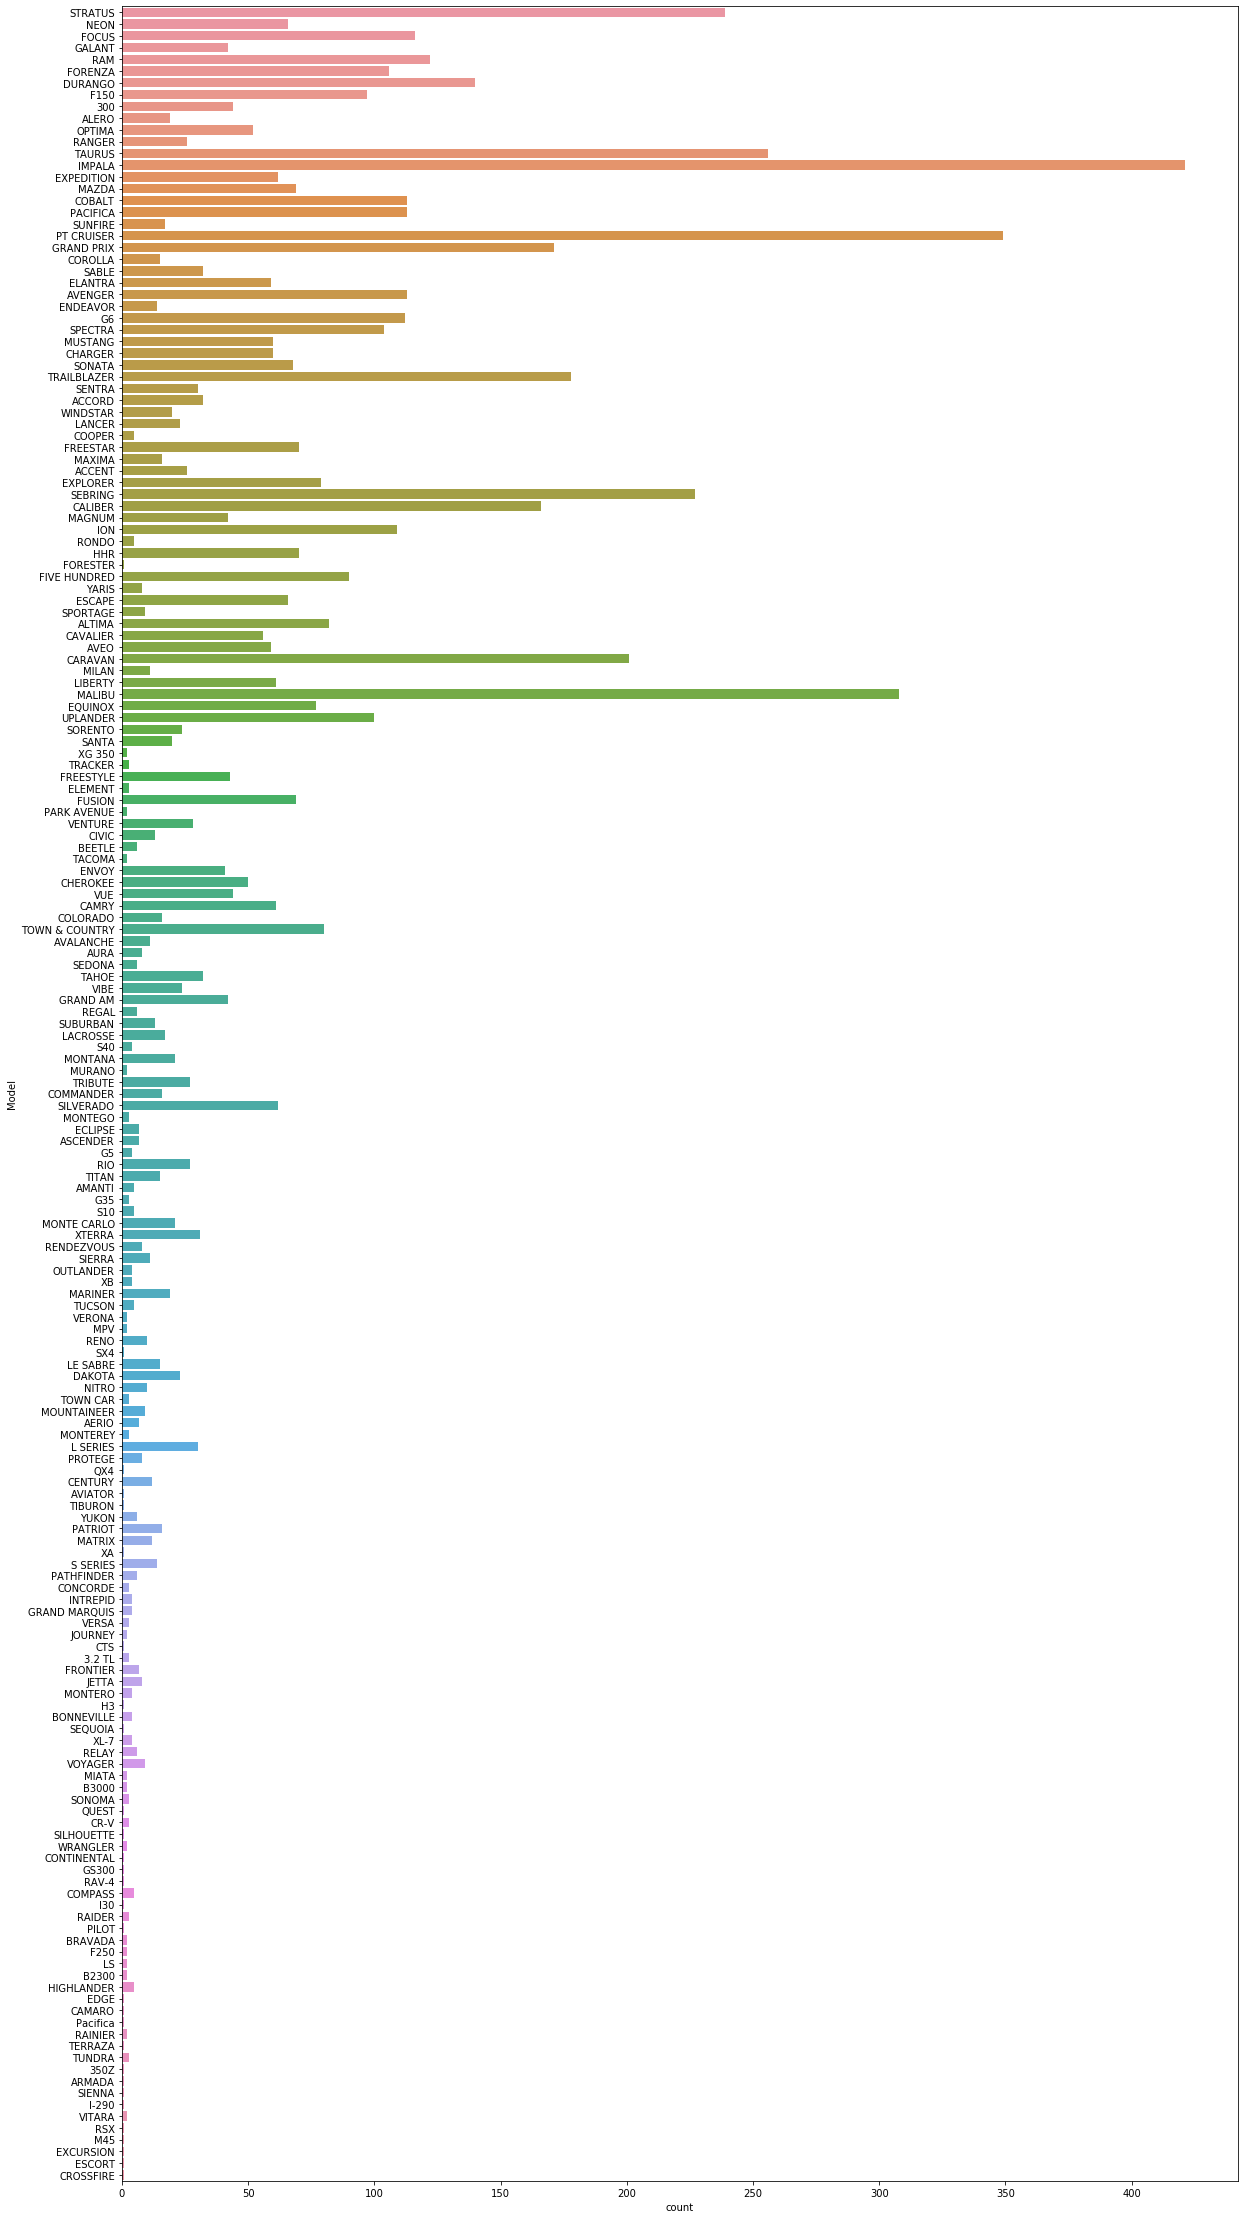

In [25]:
plt.figure(figsize=(20, 40))
sns.countplot(y = 'Model', data=data)

Atribut *Trim* se odnosi na oznaku koja pokazuje nivo kvaliteta opreme automobila. Postavlja se pitanje da li ovaj atribut ima dovoljno malo nedostajućih vrednosti kako bi izvršili popunjavanje istih.

In [26]:
data['Trim'].isna().sum()

232

In [27]:
data['Trim'].value_counts()

Bas    1316
LS      921
SE      859
SXT     338
LT      318
       ... 
GXE       1
Hig       1
DS        1
CXS       1
Spe       1
Name: Trim, Length: 104, dtype: int64

Kako je u pitanju kategorički podatak nedostajuće vrednosti popunjavamo vrednošću koja ima najveću frekvenciju - *mode*.

In [28]:
data['Trim'] = data['Trim'].fillna(data['Trim'].mode()[0])

In [29]:
data['Trim'].nunique()

104

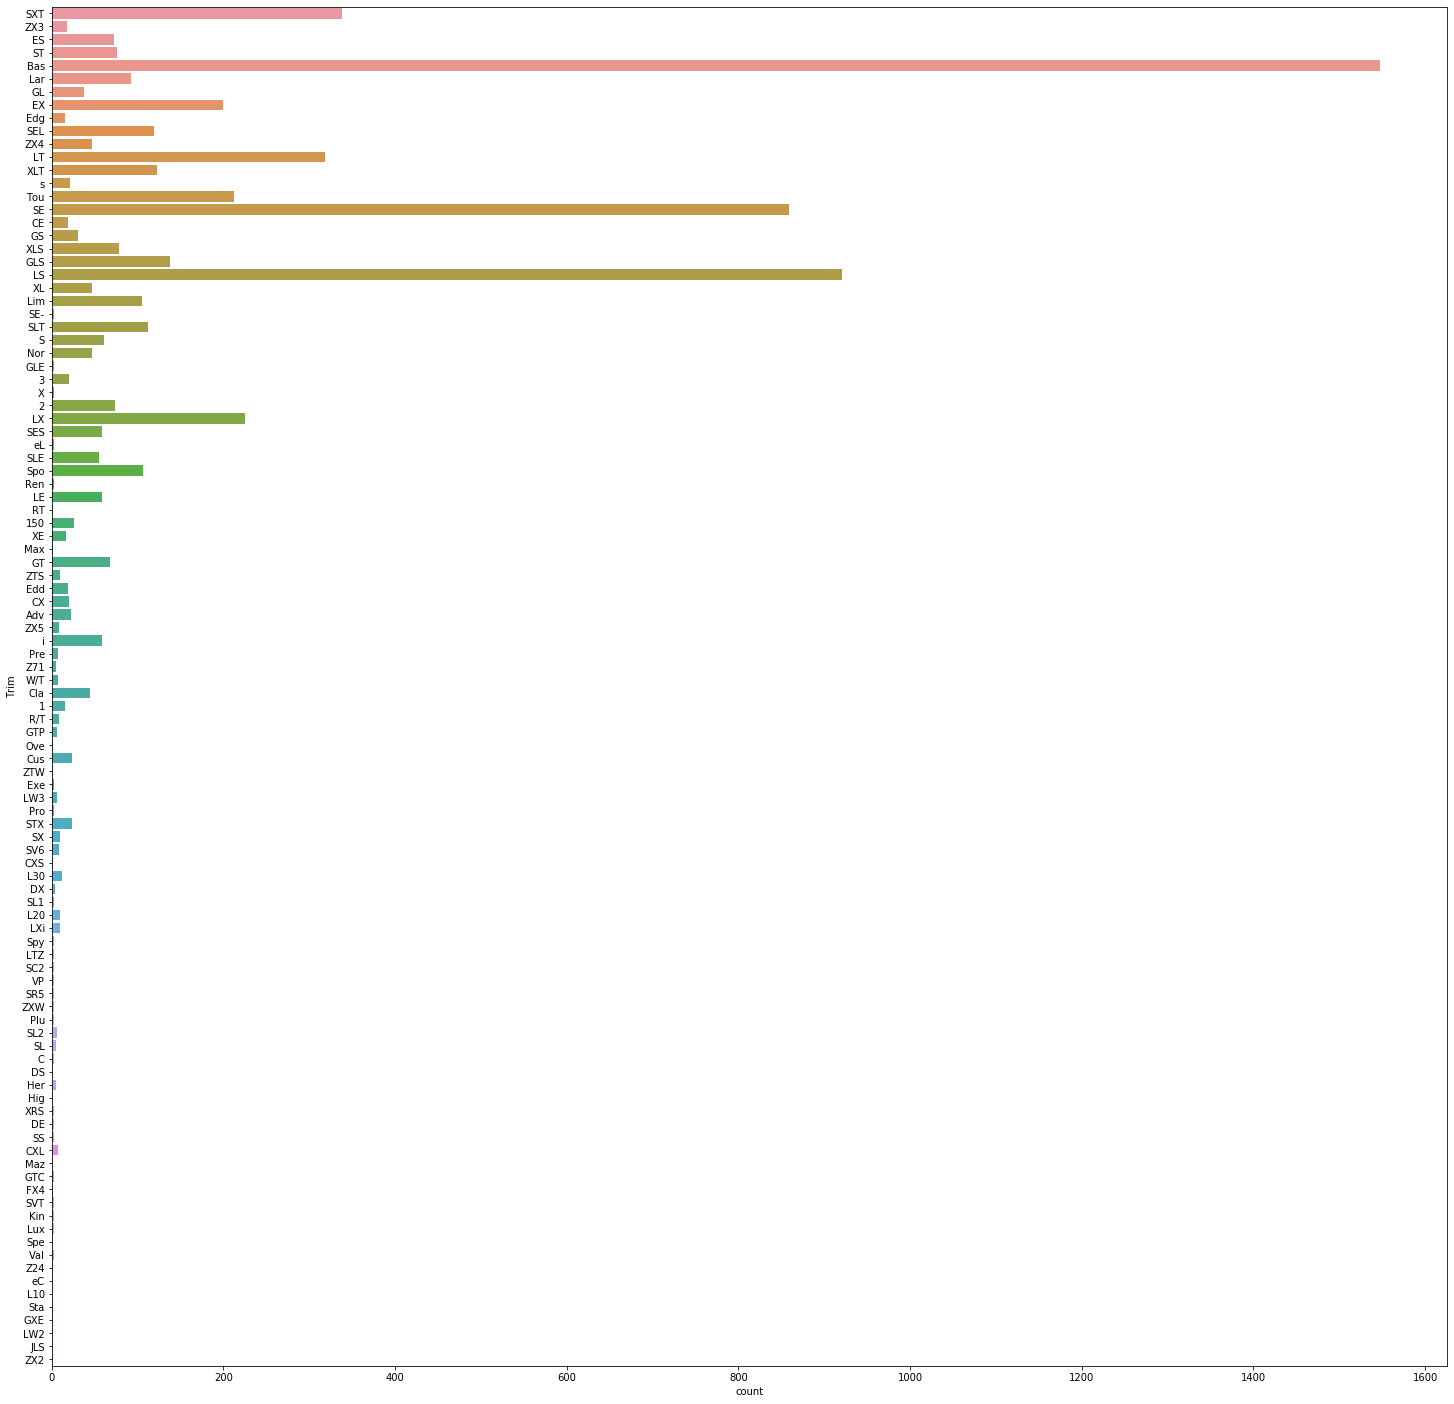

In [30]:
plt.figure(figsize=(25, 25))
sns.countplot(y = 'Trim', data=data)

U nastavku je data kratka analiza atributa *SubModel*.

In [31]:
data['SubModel'].value_counts()

4D SEDAN                  1449
4D SEDAN LS                417
4D SEDAN SE                359
4D WAGON                   193
4D SUV 4.2L LS             114
                          ... 
4D CUV 3.5L                  1
4D UTILITY 5.3L FFV LT       1
4D WAGON LW200               1
4D WAGON ZTW                 1
4D WAGON ZX5                 1
Name: SubModel, Length: 465, dtype: int64

In [32]:
data['SubModel'].nunique()

465

Kako smatramo da bi prilikom korišćenja ovog atributa potencijalno došlo do pretreniranja modela zbog velikog broja jedinstvenih vrednosti, ovaj atribut ćemo izostaviti iz dalje analize.

U okviru sledećih par linija koda dat je kratak pregled atributa *Color* i *Transmission* u pogledu broja jedinstvenih vrednosti i odnosa između njih.

In [33]:
data['Color'].value_counts()

SILVER       1379
WHITE        1119
BLUE          930
BLACK         735
GREY          710
RED           570
GOLD          504
GREEN         297
MAROON        210
BEIGE         170
BROWN          52
PURPLE         32
ORANGE         29
YELLOW         28
OTHER          28
NOT AVAIL       5
Name: Color, dtype: int64

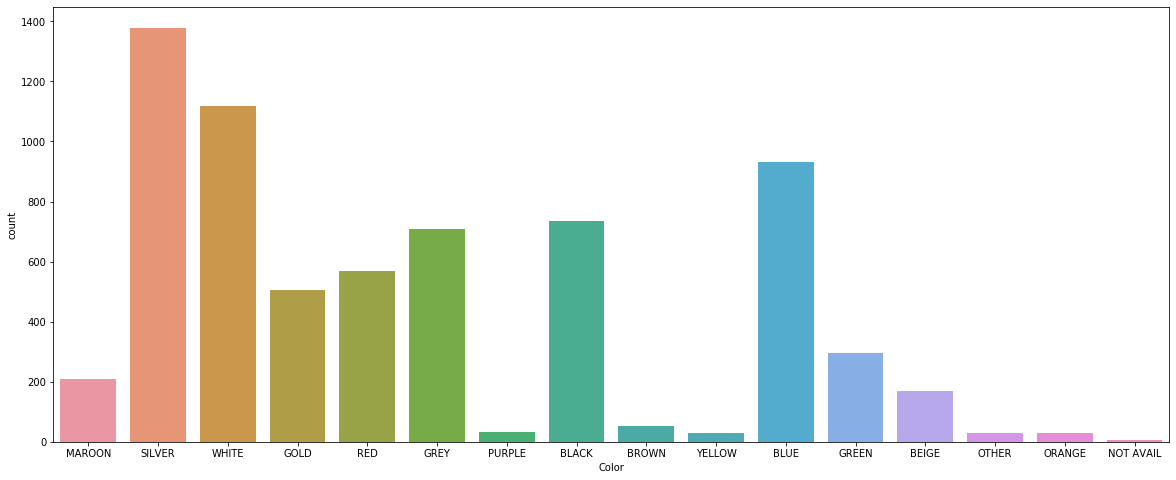

In [34]:
plt.figure(figsize=(20, 8))
sns.countplot(x = 'Color', data=data)

In [35]:
data['Transmission'].value_counts()

AUTO      6547
MANUAL     251
Name: Transmission, dtype: int64

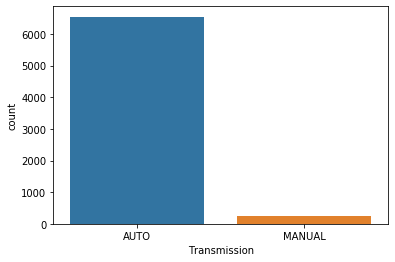

In [36]:
sns.countplot(x = 'Transmission', data=data)

Atribut *WheelTypeID* se odnosi na id tipa točka, a atribut *WheelType* na tip točka u smislu da li je u pitanju *poklopac* ili *felna*. Kako se prvi atribut odnosi isključivo na id iz dalje analize ovaj atribut će biti izostavljen.

In [37]:
data['WheelTypeID'].isna().sum()

283

In [38]:
pd.crosstab(data['WheelType'], data['WheelTypeID'])

WheelTypeID,1.0,2.0
WheelType,,
Alloy,3376,0
Covers,0,3083


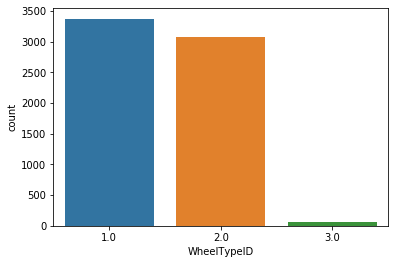

In [39]:
sns.countplot(x = 'WheelTypeID', data=data)

In [40]:
data['WheelType'].isna().sum()

339

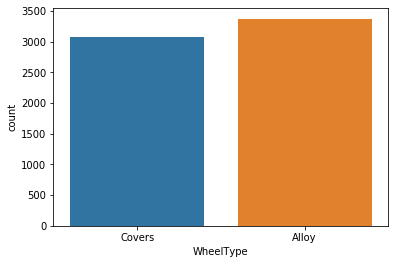

In [41]:
sns.countplot(x = 'WheelType', data=data)

Kako je *WheelType* kategorička promenljiva, popunjavanje nedostajućih vrednosti vršimo pomoću one vrednosti koja ima veću frekvenciju. Konkretno u ovom slučaju ta vrednost je *Alloy*, odnosno *felna*.

In [42]:
data['WheelType'] = data['WheelType'].fillna(data['WheelType'].mode()[0])

Atribut *VehOdo* je odnosi na pređenu kilometražu.

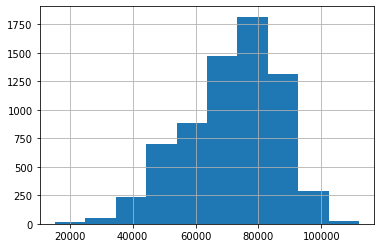

In [43]:
data["VehOdo"].hist()

Atribut *Nationality* se odnosi na zemlju porekla automobila. U nastavku je data kraća analiza ovog atributa.

In [44]:
data['Nationality'].value_counts()

AMERICAN          5639
OTHER ASIAN        779
TOP LINE ASIAN     356
OTHER               23
Name: Nationality, dtype: int64

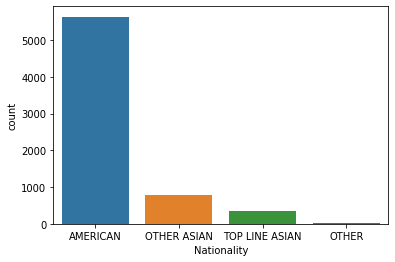

In [45]:
sns.countplot(x = 'Nationality', data=data)

In [46]:
data['Nationality'].isna().sum()

1

In [47]:
# popunjavanje NA vrednosti
# nedostaje nacionalnost Marke JEEP, tako da se ova vrednost popunjava vrednošću AMERICAN
data[data['Nationality'].isna()]

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy,PurchYear,DriveType,NumCyls
6495,6496,1/24/2010 0:02,ADESA,2008,2,JEEP,PATRIOT,Spo,4D SUV SPORT,BLACK,AUTO,2.0,Covers,61596,NaN,NaN,NaN,...,14222.0,10159.0,11695.0,14026.0,15410.0,NaN,NaN,21053,85226,NaN,9955.0,0,825,0,2010,2WD,4.0


In [48]:
data['Nationality'] = data['Nationality'].fillna(data['Nationality'].mode()[0])

In [49]:
pd.crosstab(data['Make'], data['Nationality'])

Nationality,AMERICAN,OTHER,OTHER ASIAN,TOP LINE ASIAN
Make,,,,
ACURA,0,0,4,0
BUICK,63,0,0,0
CADILLAC,1,0,0,0
CHEVROLET,1574,0,0,0
CHRYSLER,827,0,0,0
DODGE,1187,0,0,0
FORD,1059,0,0,0
GMC,61,0,0,0
HONDA,0,0,0,52


Na osnovu prethodno dobijenog rezultata zaključuje se da su atributi *Make* i *Nationality* visoko korelisane kolone. Kao i u prethodnom slučaju iz dalje analize izostavljamo jedan atribut, i to *Nationality*.

U nastavku je data analiza atributa *Size* i *TopThreeAmericanName*.

In [50]:
data['Size'].nunique()

12

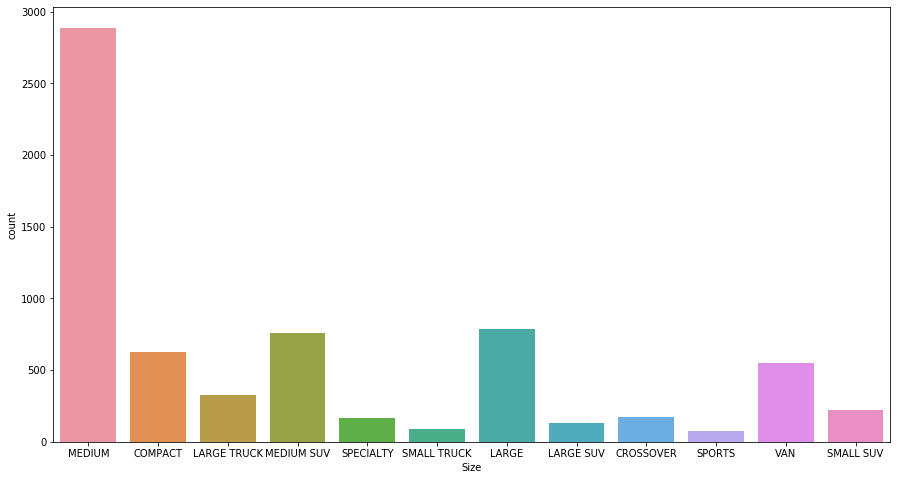

In [51]:
plt.figure(figsize=(15, 8))
sns.countplot(x = 'Size', data=data)

In [52]:
data['Size'].isna().sum()

1

In [53]:
data[data['Size'].isna()]

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy,PurchYear,DriveType,NumCyls
6495,6496,1/24/2010 0:02,ADESA,2008,2,JEEP,PATRIOT,Spo,4D SUV SPORT,BLACK,AUTO,2.0,Covers,61596,AMERICAN,NaN,NaN,...,14222.0,10159.0,11695.0,14026.0,15410.0,NaN,NaN,21053,85226,NaN,9955.0,0,825,0,2010,2WD,4.0


Na osnovu dobijenog rezultata se vidi da jedina nedostajuća vrednost atributa *Size* pripada marki *JEEP*, tako da u sledećoj liniji koda proveravamo koja je to najčešća vrednost ovog atributa za ovu marku.

In [54]:
pd.crosstab(data['Make'], data['Size'])

Size,COMPACT,CROSSOVER,LARGE,LARGE SUV,LARGE TRUCK,MEDIUM,MEDIUM SUV,SMALL SUV,SMALL TRUCK,SPECIALTY,SPORTS,VAN
Make,,,,,,,,,,,,
ACURA,0,0,0,0,0,0,0,0,0,4,0,0
BUICK,0,0,34,0,0,18,10,0,0,0,0,1
CADILLAC,0,0,0,0,0,0,0,0,0,1,0,0
CHEVROLET,228,0,442,45,73,378,255,3,21,0,1,128
CHRYSLER,0,114,5,0,0,576,0,0,0,42,1,89
DODGE,65,2,4,0,122,518,150,0,23,102,0,201
FORD,117,47,90,63,99,322,79,66,26,0,60,90
GMC,0,0,0,6,11,0,41,0,3,0,0,0
HONDA,13,0,0,1,0,32,0,6,0,0,0,0


In [55]:
# najčešća vrednost je "SMALL SUV" tako da nedostajuću vrednost popunjavamo ovom vrednošću
data.loc[data['Size'].isna(), 'Size']="SMALL SUV"

In [56]:
data['TopThreeAmericanName'].isna().sum()

1

In [57]:
data[data['TopThreeAmericanName'].isna()]

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy,PurchYear,DriveType,NumCyls
6495,6496,1/24/2010 0:02,ADESA,2008,2,JEEP,PATRIOT,Spo,4D SUV SPORT,BLACK,AUTO,2.0,Covers,61596,AMERICAN,SMALL SUV,NaN,...,14222.0,10159.0,11695.0,14026.0,15410.0,NaN,NaN,21053,85226,NaN,9955.0,0,825,0,2010,2WD,4.0


In [58]:
pd.crosstab(data['Make'], data['TopThreeAmericanName'])

TopThreeAmericanName,CHRYSLER,FORD,GM,OTHER
Make,,,,
ACURA,0,0,0,4
BUICK,0,0,63,0
CADILLAC,0,0,1,0
CHEVROLET,0,0,1574,0
CHRYSLER,827,0,0,0
DODGE,1187,0,0,0
FORD,0,1059,0,0
GMC,0,0,61,0
HONDA,0,0,0,52


In [59]:
data.loc[data['TopThreeAmericanName'].isna(), 'TopThreeAmericanName']="CHRYSLER"

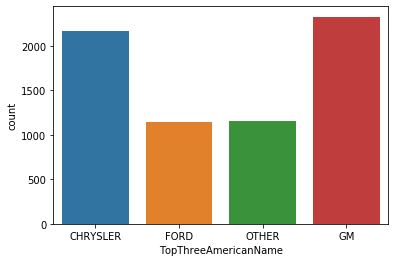

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(x = 'TopThreeAmericanName', data=data)

Iz dalje analize će biti izostavljen atribut *TopThreeAmericanName* jer je visiko korelisan sa altributom *Make* koji ćemo ostaviti.

U nastavku rada dat je pregled opsega kretanja cena po različitim osnovama.

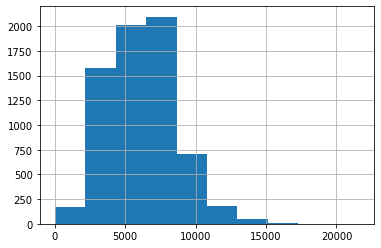

In [61]:
data['MMRAcquisitionAuctionAveragePrice'].hist()

In [62]:
data['MMRAcquisitionAuctionAveragePrice'].isna().sum()

1

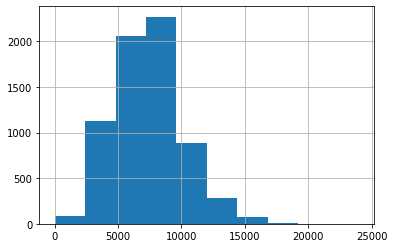

In [63]:
data['MMRAcquisitionAuctionCleanPrice'].hist()

In [64]:
data['MMRAcquisitionAuctionCleanPrice'].isna().sum()

1

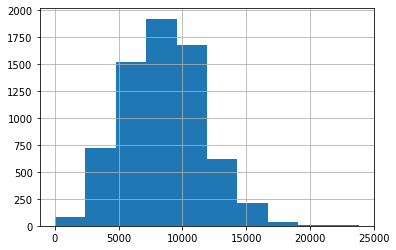

In [65]:
data['MMRAcquisitionRetailAveragePrice'].hist()

In [66]:
data['MMRAcquisitionRetailAveragePrice'].isna().sum()

1

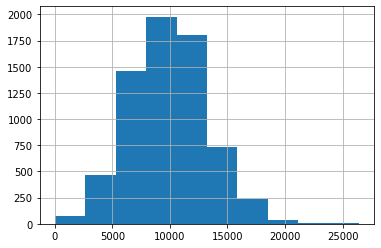

In [67]:
data['MMRAcquisitonRetailCleanPrice'].hist()

In [68]:
data['MMRAcquisitonRetailCleanPrice'].isna().sum()

1

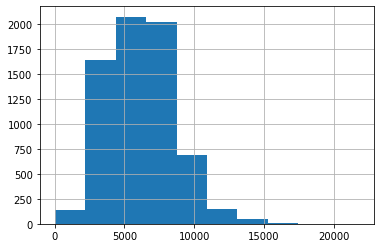

In [69]:
data['MMRCurrentAuctionAveragePrice'].hist()

In [70]:
data['MMRCurrentAuctionAveragePrice'].isna().sum()

21

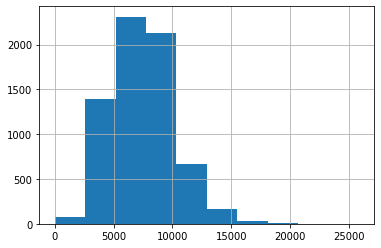

In [71]:
data['MMRCurrentAuctionCleanPrice'].hist()

In [72]:
data['MMRCurrentAuctionCleanPrice'].isna().sum()

21

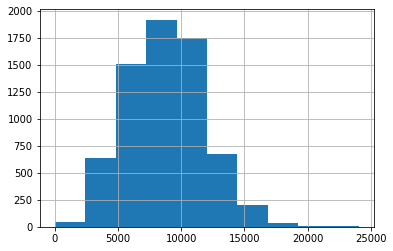

In [73]:
data['MMRCurrentRetailAveragePrice'].hist()

In [74]:
data['MMRCurrentRetailAveragePrice'].isna().sum()

21

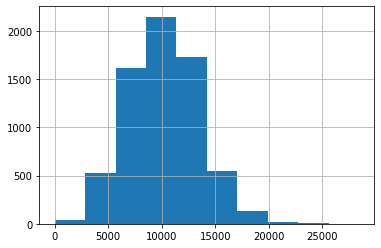

In [75]:
data['MMRCurrentRetailCleanPrice'].hist()

In [76]:
data['MMRCurrentRetailCleanPrice'].isna().sum()

21

In [77]:
data[data['MMRCurrentRetailCleanPrice'].isna()]

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy,PurchYear,DriveType,NumCyls
115,116,1/31/2009 0:03,ADESA,2005,4,CHEVROLET,MALIBU,Bas,4D SEDAN,WHITE,AUTO,2.0,Covers,85199,AMERICAN,MEDIUM,GM,...,8358.0,NaN,NaN,NaN,NaN,NaN,NaN,8655,38118,NaN,5870.0,0,1113,0,2009,2WD,4.0
158,159,1/16/2009 0:03,ADESA,2003,6,FORD,TAURUS,SES,4D SEDAN SES,GOLD,AUTO,1.0,Alloy,91255,AMERICAN,MEDIUM,FORD,...,5015.0,NaN,NaN,NaN,NaN,NaN,NaN,19638,33619,FL,4100.0,0,1353,0,2009,2WD,6.0
529,530,1/13/2010 0:07,NaN,2004,6,NISSAN,TITAN,LE,EXT CAB 5.6L,WHITE,AUTO,1.0,Alloy,74705,TOP LINE ASIAN,LARGE TRUCK,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,835,85040,NaN,10440.0,0,1272,0,2010,2WD,8.0
549,550,1/18/2009 0:06,NaN,2008,1,CHRYSLER,SEBRING,LX,4D SEDAN,BLUE,AUTO,2.0,Covers,46376,AMERICAN,MEDIUM,CHRYSLER,...,9624.0,NaN,NaN,NaN,NaN,NaN,NaN,18881,30272,NaN,8245.0,0,834,0,2009,2WD,4.0
1771,1772,1/24/2009 0:03,OTHER,2006,3,CHEVROLET,COBALT,LS,4D SEDAN LS,GREEN,AUTO,1.0,Alloy,47539,AMERICAN,COMPACT,GM,...,7436.0,NaN,NaN,NaN,NaN,NaN,NaN,21053,95673,NaN,5705.0,0,623,0,2009,2WD,4.0
2618,2619,1/26/2009 0:08,NaN,2008,1,CHRYSLER,SEBRING,Bas,2D CONVERTIBLE,BLUE,AUTO,2.0,Covers,57636,AMERICAN,MEDIUM,CHRYSLER,...,12516.0,NaN,NaN,NaN,NaN,NaN,NaN,3453,80011,NaN,9315.0,0,920,0,2009,2WD,4.0
2623,2624,1/17/2010 0:03,NaN,2008,2,JEEP,PATRIOT,Spo,4D SUV,SILVER,AUTO,1.0,Alloy,54230,AMERICAN,SMALL SUV,CHRYSLER,...,15563.0,NaN,NaN,NaN,NaN,NaN,NaN,22916,80011,NaN,8905.0,0,754,0,2010,2WD,4.0
2644,2645,1/5/2009 0:08,OTHER,2008,1,CHRYSLER,SEBRING,LX,4D SEDAN,RED,AUTO,2.0,Covers,53451,AMERICAN,MEDIUM,CHRYSLER,...,9643.0,NaN,NaN,NaN,NaN,NaN,NaN,99761,74135,NaN,7500.0,0,920,0,2009,2WD,4.0
3522,3523,1/12/2009 0:02,NaN,2005,4,FORD,TAURUS,SE,4D SEDAN SE,SILVER,AUTO,2.0,Covers,86163,AMERICAN,MEDIUM,FORD,...,5741.0,NaN,NaN,NaN,NaN,NaN,NaN,17212,76040,NaN,5255.0,0,983,0,2009,2WD,6.0
3527,3528,1/12/2009 0:03,NaN,2005,4,FORD,TAURUS,SE,4D SEDAN SE FFV,SILVER,AUTO,1.0,Alloy,80325,AMERICAN,MEDIUM,FORD,...,6670.0,NaN,NaN,NaN,NaN,NaN,NaN,19064,76040,NaN,4940.0,0,983,0,2009,2WD,6.0


Vidimo da 21 instanca ima nedostajuće vrednosti kod nekih atributa vezanih za cenu i te vrednosti su popunjene medijanom.

In [78]:
data['MMRAcquisitionAuctionAveragePrice'] = data['MMRAcquisitionAuctionAveragePrice'].fillna( data['MMRAcquisitionAuctionAveragePrice'].median())
data['MMRAcquisitionAuctionCleanPrice'] = data['MMRAcquisitionAuctionCleanPrice'].fillna( data['MMRAcquisitionAuctionCleanPrice'].median())
data['MMRAcquisitionRetailAveragePrice'] = data['MMRAcquisitionRetailAveragePrice'].fillna( data['MMRAcquisitionRetailAveragePrice'].median())
data['MMRAcquisitonRetailCleanPrice'] = data['MMRAcquisitonRetailCleanPrice'].fillna( data['MMRAcquisitonRetailCleanPrice'].median())
data['MMRCurrentAuctionAveragePrice'] = data['MMRCurrentAuctionAveragePrice'].fillna( data['MMRCurrentAuctionAveragePrice'].median())
data['MMRCurrentAuctionCleanPrice'] = data['MMRCurrentAuctionCleanPrice'].fillna( data['MMRCurrentAuctionCleanPrice'].median())
data['MMRCurrentRetailAveragePrice'] = data['MMRCurrentRetailAveragePrice'].fillna( data['MMRCurrentRetailAveragePrice'].median())
data['MMRCurrentRetailCleanPrice'] = data['MMRCurrentRetailCleanPrice'].fillna( data['MMRCurrentRetailCleanPrice'].median())

U okviru prvog dela rada pokazano je da atributi *PRIMEUNIT* i *AUCGUART* poseduju nedostajuće vrednosti. Postavlja se pitanje da li je broj tih vrednosti zanemarljiv ili ne?

In [79]:
data['PRIMEUNIT'].isna().sum()

6459

In [80]:
data['AUCGUART'].isna().sum()

6459

Na osnovu dobijenih rezultata donet je zaključak da je broj nedostajućih vrednosti kod prethodno dva pomenuta atributa izrazito visok, tako da će ova dva atributa biti izostavljeni iz dalje analize.

In [81]:
pd.crosstab(data['PRIMEUNIT'], data['AUCGUART'])

AUCGUART,GREEN,RED
PRIMEUNIT,,
NO,311,13
YES,15,0


Kako se atributi *BYRNO* i *VNZIP1* odnose na šifre i kodove, i ova dva atributa će takođe biti izostavljena iz dalje analize.

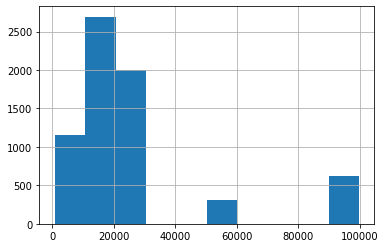

In [82]:
data['BYRNO'].hist()

In [83]:
data['BYRNO'].nunique()

61

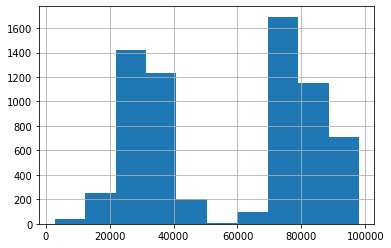

In [84]:
data['VNZIP1'].hist()

In [85]:
data['VNZIP1'].nunique()

143

Atribut *VNST* se odnosi na zemlju porekla kupca.

In [86]:
data['VNST'].isna().sum()

5667

Iako bi ovaj atribut mogao biti zanimljiv za dalju analizu, zbog izrazito visokog broja nedostajućih vrednosti izostavlja se iz dalje analize.

In [87]:
pd.crosstab(data['VNZIP1'], data['VNST'])

VNST,FL,VA
VNZIP1,,
20166,0,52
22403,0,46
22801,0,42
23234,0,2
23606,0,6
32124,100,0
32219,79,0
32225,1,0
32503,6,0


U nastavku je izvršena analiza atributa *VehBCost*(troškovi akvizicije), *IsOnlineSale* i *WarrantyCost*.

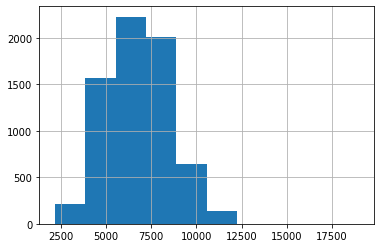

In [88]:
data['VehBCost'].hist()

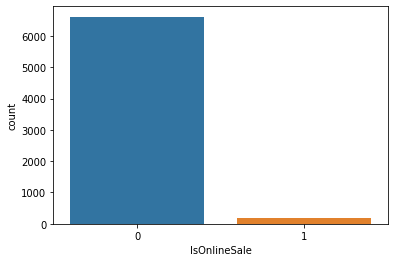

In [89]:
plt.figure(figsize=(6, 4))
sns.countplot(x = 'IsOnlineSale', data=data)

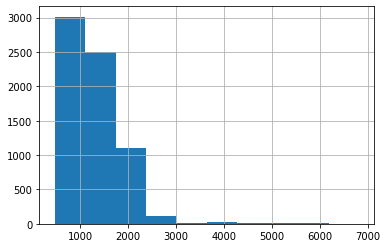

In [90]:
data['WarrantyCost'].hist()

Izlazni atribut *IsBadBuy* nam daje informaciju o tome da li je izvršena kupovina automobila bila dobra ili loša odluka.

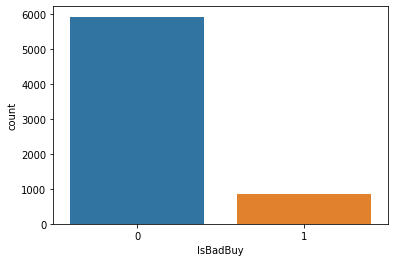

In [91]:
plt.figure(figsize=(6, 4))
sns.countplot(x = 'IsBadBuy', data=data)

Na osnovu dobijenog grafika se zaključuje da je značajno veći broj kupovina koje su "dobre".

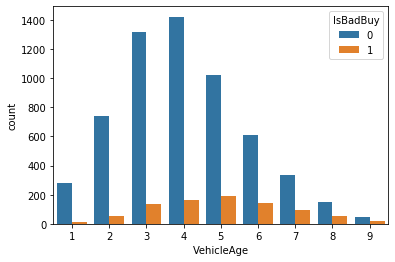

In [92]:
sns.countplot(x='VehicleAge', hue='IsBadBuy', data=data)

Na ovom grafiku se uočava da starost automobila utiče na to da bude klasifikovan kao nekvalitetan. Što je automobil mlađi manja je verovatnoća da će se klasifikovati kao nekvalitetan.

## Izostavljanje prethodno navedenih atributa iz dalje analize

In [93]:
data = data.drop(columns=['RefId', 'PurchDate', 'Auction', 'VehYear', 'WheelTypeID', 'Nationality', 'TopThreeAmericanName', 
                  'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'SubModel', 'Trim'])

In [94]:
data

,VehicleAge,Make,Model,Color,Transmission,WheelType,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy,PurchYear,DriveType,NumCyls
0,4,DODGE,STRATUS,MAROON,AUTO,Covers,73807,MEDIUM,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389,0,2009,2WD,6.0
1,5,DODGE,NEON,SILVER,AUTO,Alloy,65617,COMPACT,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630,0,2009,2WD,4.0
2,4,FORD,FOCUS,SILVER,MANUAL,Covers,69367,COMPACT,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020,0,2009,2WD,4.0
3,5,MITSUBISHI,GALANT,WHITE,AUTO,Covers,81054,MEDIUM,3901.0,4908.0,6706.0,8577.0,4709.0,5827.0,8149.0,9451.0,5600.0,0,594,0,2009,2WD,4.0
4,5,DODGE,RAM,WHITE,AUTO,Alloy,76173,LARGE TRUCK,6407.0,8051.0,10378.0,12443.0,7159.0,8934.0,11135.0,12560.0,8800.0,0,920,0,2009,2WD,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6793,3,SUZUKI,FORENZA,RED,AUTO,Covers,60549,MEDIUM,3905.0,4892.0,4717.0,5783.0,3556.0,4714.0,6629.0,8766.0,5600.0,0,533,0,2009,2WD,4.0
6794,4,JEEP,LIBERTY,RED,AUTO,Alloy,85377,SMALL SUV,7104.0,8601.0,8172.0,9789.0,7536.0,8859.0,11223.0,12190.0,6600.0,0,983,0,2009,4WD,6.0
6795,7,CHEVROLET,TRAILBLAZER,BEIGE,AUTO,Alloy,75700,MEDIUM SUV,5095.0,5988.0,6003.0,6967.0,5720.0,7185.0,8125.0,9754.0,7000.0,0,1455,0,2009,2WD,4.0
6796,3,JEEP,COMMANDER,BLACK,AUTO,Covers,69941,LARGE SUV,12195.0,13568.0,13671.0,15153.0,13646.0,15015.0,17619.0,19161.0,10400.0,0,1606,0,2009,2WD,8.0


## Dummies

In [95]:
df_dummies = pd.get_dummies(data, columns = ['Make', 'Model', 'Color', 'Size', 'DriveType'])
pd.set_option('display.max_columns', 200)
df_dummies

,VehicleAge,Transmission,WheelType,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy,PurchYear,NumCyls,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,Make_HONDA,Make_HUMMER,Make_HYUNDAI,Make_INFINITI,Make_ISUZU,Make_JEEP,Make_KIA,Make_LEXUS,Make_LINCOLN,Make_MAZDA,Make_MERCURY,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_OLDSMOBILE,Make_PLYMOUTH,Make_PONTIAC,Make_SATURN,Make_SCION,Make_SUBARU,Make_SUZUKI,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Model_3.2 TL,Model_300,Model_350Z,Model_ACCENT,Model_ACCORD,Model_AERIO,Model_ALERO,Model_ALTIMA,Model_AMANTI,Model_ARMADA,Model_ASCENDER,Model_AURA,Model_AVALANCHE,Model_AVENGER,Model_AVEO,Model_AVIATOR,Model_B2300,Model_B3000,Model_BEETLE,Model_BONNEVILLE,Model_BRAVADA,Model_CALIBER,Model_CAMARO,Model_CAMRY,Model_CARAVAN,Model_CAVALIER,Model_CENTURY,Model_CHARGER,Model_CHEROKEE,Model_CIVIC,Model_COBALT,Model_COLORADO,Model_COMMANDER,Model_COMPASS,Model_CONCORDE,Model_CONTINENTAL,Model_COOPER,Model_COROLLA,Model_CR-V,Model_CROSSFIRE,Model_CTS,Model_DAKOTA,Model_DURANGO,Model_ECLIPSE,Model_EDGE,Model_ELANTRA,Model_ELEMENT,Model_ENDEAVOR,Model_ENVOY,Model_EQUINOX,...,Model_PROTEGE,Model_PT CRUISER,Model_Pacifica,Model_QUEST,Model_QX4,Model_RAIDER,Model_RAINIER,Model_RAM,Model_RANGER,Model_RAV-4,Model_REGAL,Model_RELAY,Model_RENDEZVOUS,Model_RENO,Model_RIO,Model_RONDO,Model_RSX,Model_S SERIES,Model_S10,Model_S40,Model_SABLE,Model_SANTA,Model_SEBRING,Model_SEDONA,Model_SENTRA,Model_SEQUOIA,Model_SIENNA,Model_SIERRA,Model_SILHOUETTE,Model_SILVERADO,Model_SONATA,Model_SONOMA,Model_SORENTO,Model_SPECTRA,Model_SPORTAGE,Model_STRATUS,Model_SUBURBAN,Model_SUNFIRE,Model_SX4,Model_TACOMA,Model_TAHOE,Model_TAURUS,Model_TERRAZA,Model_TIBURON,Model_TITAN,Model_TOWN & COUNTRY,Model_TOWN CAR,Model_TRACKER,Model_TRAILBLAZER,Model_TRIBUTE,Model_TUCSON,Model_TUNDRA,Model_UPLANDER,Model_VENTURE,Model_VERONA,Model_VERSA,Model_VIBE,Model_VITARA,Model_VOYAGER,Model_VUE,Model_WINDSTAR,Model_WRANGLER,Model_XA,Model_XB,Model_XG 350,Model_XL-7,Model_XTERRA,Model_YARIS,Model_YUKON,Color_BEIGE,Color_BLACK,Color_BLUE,Color_BROWN,Color_GOLD,Color_GREEN,Color_GREY,Color_MAROON,Color_NOT AVAIL,Color_ORANGE,Color_OTHER,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,DriveType_2WD,DriveType_4WD,DriveType_AWD
0,4,AUTO,Covers,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389,0,2009,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,5,AUTO,Alloy,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630,0,2009,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4,MANUAL,Covers,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020,0,2009,4.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [96]:
idx = df_dummies.columns.get_indexer(df_dummies.select_dtypes('object').columns)
for k in idx:
    print(f'{df_dummies.columns[k]}         {np.unique(df_dummies.iloc[:,k])}')

Transmission         ['AUTO' 'MANUAL']
WheelType         ['Alloy' 'Covers']


## Kvantifikacija podataka

In [97]:
df_dummies = df_dummies.replace({'Transmission' : {'MANUAL':0, 'AUTO':1}})
df_dummies = df_dummies.replace({'WheelType' : {'Covers':0, 'Alloy':1}})

In [98]:
df_dummies

,VehicleAge,Transmission,WheelType,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy,PurchYear,NumCyls,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,Make_HONDA,Make_HUMMER,Make_HYUNDAI,Make_INFINITI,Make_ISUZU,Make_JEEP,Make_KIA,Make_LEXUS,Make_LINCOLN,Make_MAZDA,Make_MERCURY,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_OLDSMOBILE,Make_PLYMOUTH,Make_PONTIAC,Make_SATURN,Make_SCION,Make_SUBARU,Make_SUZUKI,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Model_3.2 TL,Model_300,Model_350Z,Model_ACCENT,Model_ACCORD,Model_AERIO,Model_ALERO,Model_ALTIMA,Model_AMANTI,Model_ARMADA,Model_ASCENDER,Model_AURA,Model_AVALANCHE,Model_AVENGER,Model_AVEO,Model_AVIATOR,Model_B2300,Model_B3000,Model_BEETLE,Model_BONNEVILLE,Model_BRAVADA,Model_CALIBER,Model_CAMARO,Model_CAMRY,Model_CARAVAN,Model_CAVALIER,Model_CENTURY,Model_CHARGER,Model_CHEROKEE,Model_CIVIC,Model_COBALT,Model_COLORADO,Model_COMMANDER,Model_COMPASS,Model_CONCORDE,Model_CONTINENTAL,Model_COOPER,Model_COROLLA,Model_CR-V,Model_CROSSFIRE,Model_CTS,Model_DAKOTA,Model_DURANGO,Model_ECLIPSE,Model_EDGE,Model_ELANTRA,Model_ELEMENT,Model_ENDEAVOR,Model_ENVOY,Model_EQUINOX,...,Model_PROTEGE,Model_PT CRUISER,Model_Pacifica,Model_QUEST,Model_QX4,Model_RAIDER,Model_RAINIER,Model_RAM,Model_RANGER,Model_RAV-4,Model_REGAL,Model_RELAY,Model_RENDEZVOUS,Model_RENO,Model_RIO,Model_RONDO,Model_RSX,Model_S SERIES,Model_S10,Model_S40,Model_SABLE,Model_SANTA,Model_SEBRING,Model_SEDONA,Model_SENTRA,Model_SEQUOIA,Model_SIENNA,Model_SIERRA,Model_SILHOUETTE,Model_SILVERADO,Model_SONATA,Model_SONOMA,Model_SORENTO,Model_SPECTRA,Model_SPORTAGE,Model_STRATUS,Model_SUBURBAN,Model_SUNFIRE,Model_SX4,Model_TACOMA,Model_TAHOE,Model_TAURUS,Model_TERRAZA,Model_TIBURON,Model_TITAN,Model_TOWN & COUNTRY,Model_TOWN CAR,Model_TRACKER,Model_TRAILBLAZER,Model_TRIBUTE,Model_TUCSON,Model_TUNDRA,Model_UPLANDER,Model_VENTURE,Model_VERONA,Model_VERSA,Model_VIBE,Model_VITARA,Model_VOYAGER,Model_VUE,Model_WINDSTAR,Model_WRANGLER,Model_XA,Model_XB,Model_XG 350,Model_XL-7,Model_XTERRA,Model_YARIS,Model_YUKON,Color_BEIGE,Color_BLACK,Color_BLUE,Color_BROWN,Color_GOLD,Color_GREEN,Color_GREY,Color_MAROON,Color_NOT AVAIL,Color_ORANGE,Color_OTHER,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,DriveType_2WD,DriveType_4WD,DriveType_AWD
0,4,1,0,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389,0,2009,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,5,1,1,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630,0,2009,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4,0,0,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020,0,2009,4.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [99]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Columns: 266 entries, VehicleAge to DriveType_AWD
dtypes: float64(10), int64(8), uint8(248)
memory usage: 2.5 MB


## Promena tipa izlaznog atributa

Kako je izlazni atribut tipa *int*, a to nam ne odgovara za probleme klasifikacije izvršena je promena tipa u *bool*.

In [100]:
# IsBadBuy nam je int
df_dummies.select_dtypes(include='int64')

,VehicleAge,Transmission,WheelType,VehOdo,IsOnlineSale,WarrantyCost,IsBadBuy,PurchYear
0,4,1,0,73807,0,1389,0,2009
1,5,1,1,65617,0,630,0,2009
2,4,0,0,69367,0,1020,0,2009
3,5,1,0,81054,0,594,0,2009
4,5,1,1,76173,0,920,0,2009
...,...,...,...,...,...,...,...,...
6793,3,1,0,60549,0,533,0,2009
6794,4,1,1,85377,0,983,0,2009
6795,7,1,1,75700,0,1455,0,2009
6796,3,1,0,69941,0,1606,0,2009


In [101]:
df_dummies['IsBadBuy'] = df_dummies['IsBadBuy'].astype('bool')

In [102]:
# postavljanje izlazne varijable na kraj
izlazna = df_dummies['IsBadBuy']
df_dummies = df_dummies.drop(columns=['IsBadBuy'])
df_dummies['IsBadBuy'] = izlazna
df_dummies.iloc[:,-1]

0       False
1       False
2       False
3       False
4       False
        ...  
6793    False
6794    False
6795    False
6796    False
6797    False
Name: IsBadBuy, Length: 6798, dtype: bool

In [103]:
df_dummies

,VehicleAge,Transmission,WheelType,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,NumCyls,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,Make_HONDA,Make_HUMMER,Make_HYUNDAI,Make_INFINITI,Make_ISUZU,Make_JEEP,Make_KIA,Make_LEXUS,Make_LINCOLN,Make_MAZDA,Make_MERCURY,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_OLDSMOBILE,Make_PLYMOUTH,Make_PONTIAC,Make_SATURN,Make_SCION,Make_SUBARU,Make_SUZUKI,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Model_3.2 TL,Model_300,Model_350Z,Model_ACCENT,Model_ACCORD,Model_AERIO,Model_ALERO,Model_ALTIMA,Model_AMANTI,Model_ARMADA,Model_ASCENDER,Model_AURA,Model_AVALANCHE,Model_AVENGER,Model_AVEO,Model_AVIATOR,Model_B2300,Model_B3000,Model_BEETLE,Model_BONNEVILLE,Model_BRAVADA,Model_CALIBER,Model_CAMARO,Model_CAMRY,Model_CARAVAN,Model_CAVALIER,Model_CENTURY,Model_CHARGER,Model_CHEROKEE,Model_CIVIC,Model_COBALT,Model_COLORADO,Model_COMMANDER,Model_COMPASS,Model_CONCORDE,Model_CONTINENTAL,Model_COOPER,Model_COROLLA,Model_CR-V,Model_CROSSFIRE,Model_CTS,Model_DAKOTA,Model_DURANGO,Model_ECLIPSE,Model_EDGE,Model_ELANTRA,Model_ELEMENT,Model_ENDEAVOR,Model_ENVOY,Model_EQUINOX,Model_ESCAPE,...,Model_PT CRUISER,Model_Pacifica,Model_QUEST,Model_QX4,Model_RAIDER,Model_RAINIER,Model_RAM,Model_RANGER,Model_RAV-4,Model_REGAL,Model_RELAY,Model_RENDEZVOUS,Model_RENO,Model_RIO,Model_RONDO,Model_RSX,Model_S SERIES,Model_S10,Model_S40,Model_SABLE,Model_SANTA,Model_SEBRING,Model_SEDONA,Model_SENTRA,Model_SEQUOIA,Model_SIENNA,Model_SIERRA,Model_SILHOUETTE,Model_SILVERADO,Model_SONATA,Model_SONOMA,Model_SORENTO,Model_SPECTRA,Model_SPORTAGE,Model_STRATUS,Model_SUBURBAN,Model_SUNFIRE,Model_SX4,Model_TACOMA,Model_TAHOE,Model_TAURUS,Model_TERRAZA,Model_TIBURON,Model_TITAN,Model_TOWN & COUNTRY,Model_TOWN CAR,Model_TRACKER,Model_TRAILBLAZER,Model_TRIBUTE,Model_TUCSON,Model_TUNDRA,Model_UPLANDER,Model_VENTURE,Model_VERONA,Model_VERSA,Model_VIBE,Model_VITARA,Model_VOYAGER,Model_VUE,Model_WINDSTAR,Model_WRANGLER,Model_XA,Model_XB,Model_XG 350,Model_XL-7,Model_XTERRA,Model_YARIS,Model_YUKON,Color_BEIGE,Color_BLACK,Color_BLUE,Color_BROWN,Color_GOLD,Color_GREEN,Color_GREY,Color_MAROON,Color_NOT AVAIL,Color_ORANGE,Color_OTHER,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,DriveType_2WD,DriveType_4WD,DriveType_AWD,IsBadBuy
0,4,1,0,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389,2009,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,False
1,5,1,1,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630,2009,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False
2,4,0,0,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020,2009,4.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Na kraju ovog dela rada sve prethodno izvršene promene originalnog skupa podataka sačuvane su u okviru fajla *SredjeniPodaci.csv*.

In [104]:
df_dummies.to_csv('data/SredjeniPodaci.csv')